In [19]:
import pandas as pd 
import numpy as np 

X = pd.read_csv('../Boosts/Datasets/X.csv')
y = pd.read_csv('../Boosts/Datasets/y.csv')

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

In [21]:
import joblib

rf = joblib.load('../Boosts/SavedModels/Random_Forest.joblib');rf

RandomForestClassifier(bootstrap=False, class_weight={0: 2, 1: 3},
                       criterion='entropy', max_features=9, min_samples_leaf=3,
                       min_samples_split=4)

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ensemble_model = AdaBoostClassifier(base_estimator=rf, n_estimators=10, random_state=42)
ensemble_model.fit(X_train, np.ravel(y_train))

AdaBoostClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                         class_weight={0: 2,
                                                                       1: 3},
                                                         criterion='entropy',
                                                         max_features=9,
                                                         min_samples_leaf=3,
                                                         min_samples_split=4),
                   n_estimators=10, random_state=42)

In [23]:
y_pred = ensemble_model.predict(X_test)

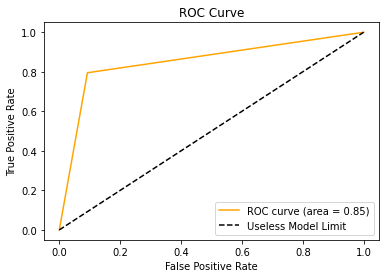

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

In [25]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.875608,0.844048,0.864127,0.859828,0.863420
recall,0.907571,0.795077,0.864127,0.851324,0.864127
f1-score,0.891303,0.818831,0.864127,0.855067,0.863315
support,8136.000000,5119.000000,0.864127,13255.000000,13255.000000


In [26]:
joblib.dump(ensemble_model, '../Boosts/BoostedModels/RF_AdaBoosted.joblib', compress=('gzip',9))

['../Boosts/BoostedModels/RF_AdaBoosted.joblib']